In [2]:
%matplotlib inline
# %matplotlib notebook
%reload_ext autoreload
%autoreload 2
# %qtconsole
# %config InlineBackend.figure_format = 'retina'

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import loren_frank_data_processing as lfdp
import logging
logging.basicConfig(level=logging.INFO)
import os
import IPython
import ipywidgets
import subprocess

# import nutmeg
from jpy_video import Video

The goal of this notebook is to make sure the linear distances and classification of trials is done properly for each epoch.

In [40]:
from src.parameters import ANIMALS

In [41]:
ANIMALS

{'JZ1': Animal(directory='/home/droumis/Src/Roumis_2018/src/../Raw-Data/JZ1', short_name='JZ1')}

In [42]:
epoch_info = lfdp.make_epochs_dataframe(ANIMALS)
epoch_info

environment   type  exposure
animal day epoch                                    
JZ1    1   1                  sleep  sleep       NaN
           2                 wtrack    run       1.0
           3                  sleep  sleep       NaN
           4                 wtrack    run       2.0
           5                  sleep  sleep       NaN
           6              openfield    run       1.0
           7                  sleep  sleep       NaN
           8              openfield    run       2.0
           9                  sleep  sleep       NaN
       2   1                  sleep  sleep       NaN
           2                 wtrack    run       3.0
           3                  sleep  sleep       NaN
           4                 wtrack    run       4.0
           5                  sleep  sleep       NaN
           6              openfield    run       3.0
           7                  sleep  sleep       NaN
           8              openfield    run       4.0
           9                  sleep  sleep       NaN
       3   1                  sleep  sleep       NaN
           2                 wtrack    run       5.0
           3                  sleep  sleep       NaN
           4                 wtrack    run       6.0
           5                  sleep  sleep       NaN
           6              openfield    run       5.0
           7                  sleep  sleep       NaN
           8              openfield    run       6.0
           9                  sleep  sleep       NaN
       4   1                  sleep  sleep       NaN
           2                 wtrack    run       7.0
           3                  sleep  sleep       NaN
...                             ...    ...       ...
       11  7                  sleep  sleep       NaN
           8              openfield    run      22.0
           9                  sleep  sleep       NaN
       12  1                  sleep  sleep       NaN
           2      sixarmtrack_right    run       5.0
           3                  sleep  sleep       NaN
           4      sixarmtrack_right    run       6.0
           5                  sleep  sleep       NaN
           6              openfield    run      23.0
           7                  sleep  sleep       NaN
           8              openfield    run      24.0
           9                  sleep  sleep       NaN
       13  1                  sleep  sleep       NaN
           2      sixarmtrack_right    run       7.0
           3                  sleep  sleep       NaN
           4      sixarmtrack_right    run       8.0
           5                  sleep  sleep       NaN
           6              openfield    run      25.0
           7                  sleep  sleep       NaN
           8              openfield    run      26.0
           9                  sleep  sleep       NaN
       14  1                  sleep  sleep       NaN
           2      sixarmtrack_right    run       9.0
           3                  sleep  sleep       NaN
           4      sixarmtrack_right    run      10.0
           5                  sleep  sleep       NaN
           6              openfield    run      27.0
           7                  sleep  sleep       NaN
           8              openfield    run      28.0
           9                  sleep  sleep       NaN

[126 rows x 3 columns]

In [43]:
epoch_info.loc[epoch_info.environment == 'wtrack'].xs(('JZ1', 7), drop_level=False)

,,,environment,type,exposure
animal,day,epoch,,,
JZ1,7,2,wtrack,run,13.0


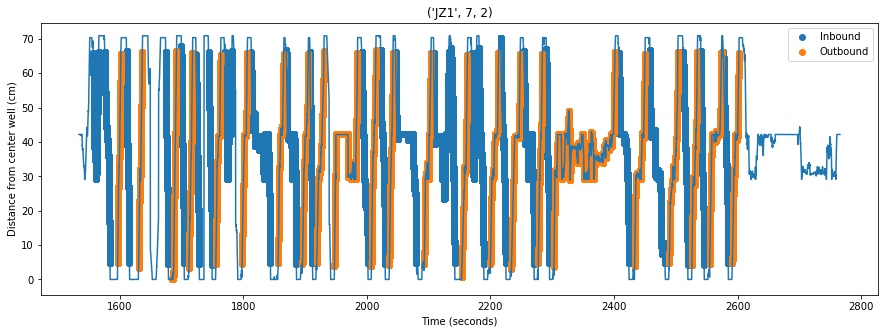

In [44]:
# for epoch_key in epoch_info.loc[[epoch_info.environment == 'wtrack' & epoch_info.day == 7]].index:
for epoch_key in epoch_info.loc[epoch_info.environment == 'wtrack'].xs(('JZ1', 7), drop_level=False).index:
    position_info = lfdp.get_interpolated_position_dataframe(
        epoch_key, ANIMALS)

    plt.figure(figsize=(15, 5))
    plt.plot(position_info.index.total_seconds().values,
             position_info.linear_distance.values)

    for label, df in position_info.groupby('task'):
        plt.scatter(df.index.total_seconds(), df.linear_distance, label=label)

    plt.xlabel('Time (seconds)')
    plt.ylabel('Distance from center well (cm)')
    plt.legend();
    plt.title(epoch_key)
    

In [45]:
def plot_linear_distance(position_info, time):
    p = position_info.copy().set_index(position_info.index.total_seconds()).loc[time]
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].plot(p.index.values, p.linear_distance.values, linewidth=2, label='HMM')
    axes[0].set_xlabel('time')
    axes[0].set_ylabel('distance (cm)')
    axes[0].legend();
    
    axes[1].plot(position_info.x_position.values, position_info.y_position.values)
    axes[1].plot(p.x_position.values, p.y_position.values,
                 linewidth=3)
    axes[1].scatter(p.iloc[0].x_position, p.iloc[0].y_position,
                    label='start', color='lightgreen', s=100, zorder=1000)
    axes[1].scatter(p.iloc[-1].x_position, p.iloc[-1].y_position,
                    label='stop', color='red', s=100, zorder=1000)
    axes[1].legend()

In [46]:
epoch_key = ('JZ1', 7, 2)
position_info = lfdp.get_interpolated_position_dataframe(
    epoch_key, ANIMALS)

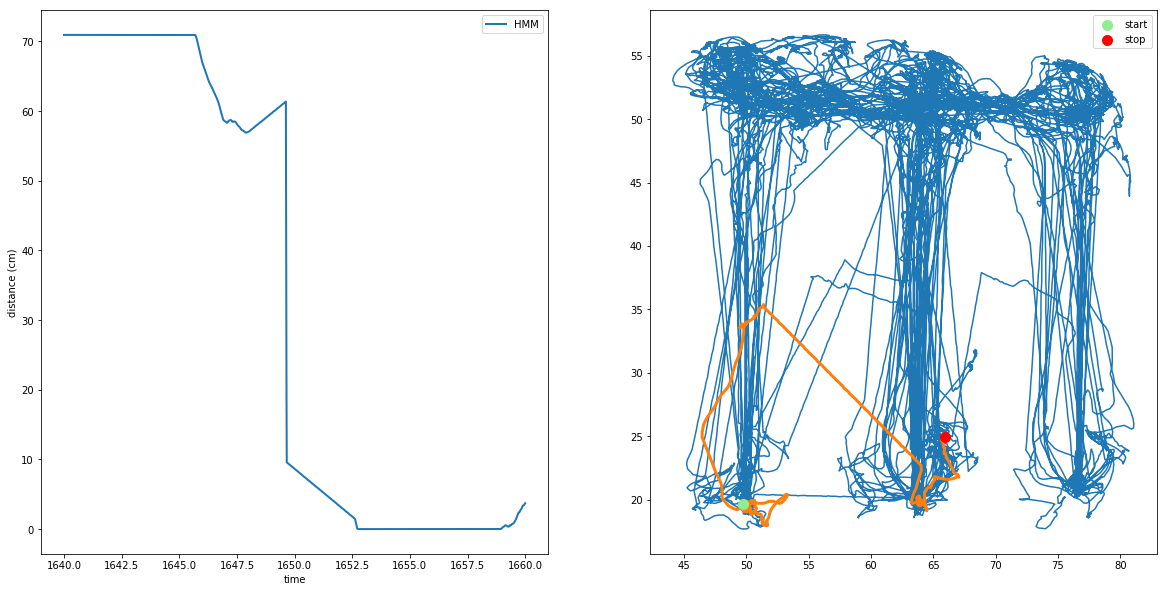

In [47]:
time = slice(1640, 1660)
plot_linear_distance(position_info, time)

In [25]:
# use ffmpeg to convert the video from h264 to mp4 contained h264
def convert_to_mp4(from_file, to_file):
    import subprocess as sp
    args = ['ffmpeg', '-i', from_file, to_file]
    try:
        ffmpeg = sp.Popen(args, stdout = sp.PIPE, stderr = sp.STDOUT)
        process_output =  ffmpeg.communicate()
#         print("process_output:", process_output)
    except CalledProcessError as e:
        print("conversion failed", e)

In [24]:
h264_file =  '../Raw-Data/vx1_JZ1/raw/20161121/20161121_JZ1_02.1.h264'
mp4_file = '../Raw-Data/20161121_JZ1_02.1.mp4'
os.path.lexists(h264_file)

True

In [22]:
convert_to_mp4(h264_file, mp4_file)

communicate: (b"ffmpeg version 2.8.11-0ubuntu0.16.04.1 Copyright (c) 2000-2017 the FFmpeg developers\n  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.4) 20160609\n  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --ena

In [ ]:
# #use ffmpeg to select certain frames from the mp4 via the -ss and -to flags
# def get_video_clip(filename, start_time, end_time):
#     import subprocess as sp
#     command1 = ['ffmpeg',
#             '-i', filename,
#             '-ss', str(datetime.,

#             '-to', str(datetime.,
#             '-f', 'image2pipe',
#             '-pix_fmt', 'rgb24',
#             '-vcodec','rawvideo', '-']
#     pipe = sp.Popen(command1, stdout=sp.PIPE, stderr = sp.STDOUT, bufsize=10**8)

In [33]:
def get_video_info(fileloc) :
    command = ['ffprobe',
               '-v', 'fatal',
               '-show_entries', 'stream=width,height,r_frame_rate,duration',
               '-of', 'default=noprint_wrappers=1:nokey=1',
               fileloc, '-sexagesimal']
    ffmpeg = subprocess.Popen(command, stderr=subprocess.PIPE ,stdout = subprocess.PIPE )
    out, err = ffmpeg.communicate()
    if(err) : print(err)
    out = out.decode().split('\n')
    return {'file' : fileloc,
            'width': int(out[0]),
            'height' : int(out[1]),
            'fps': float(out[2].split('/')[0])/float(out[2].split('/')[1]),
            'duration' : out[3] }

In [77]:
def read_frames(fileloc,start_time, end_time, fps, width, height) :
    import datetime
    num_frames = (end_time - start_time)*int(info['fps'])
    command = ['ffmpeg',
               '-loglevel', 'fatal',
               '-ss', str(datetime.timedelta(seconds=start_time)),
               '-i', fileloc,
#                '-to', str(datetime.timedelta(seconds=end_time)),
               #'-vf', '"select=gte(n,%d)"'%(frame),
#                '-threads', str(4),
               '-vf', 'scale=%d:%d'%(width, height),
               '-vframes', str(num_frames),
               '-f', 'image2pipe',
               '-pix_fmt', 'rgb24',
               '-vcodec', 'rawvideo', '-']
    print(command)
    ffmpeg = subprocess.Popen(command, stderr=subprocess.PIPE, stdout = subprocess.PIPE)
    out, err = ffmpeg.communicate()
    if(err) : print('error',err); return None;
    video = np.fromstring(out, dtype='uint8').reshape((num_frames,height,width,3)) #NHWC
    return video

In [78]:
# vidclip = read_frames(mp4_file, start_time, end_time, info['fps'], info['width'], info['height'])

['ffmpeg', '-loglevel', 'fatal', '-ss', '0:01:45', '-i', '../Raw-Data/20161121_JZ1_02.1.mp4', '-vf', 'scale=1292:964', '-vframes', '50', '-f', 'image2pipe', '-pix_fmt', 'rgb24', '-vcodec', 'rawvideo', '-']


In [110]:
def plot_pos_clip(fileloc, start, end, position_info):
    start_time = int(start - position_info.index.total_seconds()[0])
    end_time = int(end - position_info.index.total_seconds()[0])
    print(start, end, position_info.index.total_seconds()[0], start_time,end_time)
    info = get_video_info(fileloc)
    vidclip = read_frames(fileloc,start_time, end_time, info['fps'], info['width'], info['height'])
    print ("The animation will be {:.1f} seconds long.".format(end_time-start_time))
    import matplotlib.animation as animation
    plt.rcParams["animation.html"] = "html5"
    fig, axes = plt.subplots()
    ims = []
    for i in range(vidclip.shape[0]):
        im = plt.imshow(vidclip[i,:,:,:], animated=True)
        ims.append([im])
    ani = animation.ArtistAnimation(fig, ims, interval=info['fps'], blit=True,
                                    repeat_delay=10)
    return(ani)

1640 1641 1534.357667 105 106
['ffmpeg', '-loglevel', 'fatal', '-ss', '0:01:45', '-i', '../Raw-Data/20161121_JZ1_02.1.mp4', '-vf', 'scale=1292:964', '-vframes', '25', '-f', 'image2pipe', '-pix_fmt', 'rgb24', '-vcodec', 'rawvideo', '-']
The animation will be 1.0 seconds long.


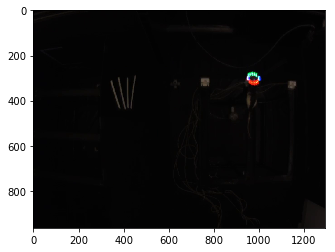

In [111]:
plot_pos_clip(mp4_file,1640, 1641, position_info)

In [113]:
!ffprobe -v quiet -print_format json -show_format '../Raw-Data/vx1_JZ1/raw/20161121/20161121_JZ1_02.1.h264'

{
    "format": {
        "filename": "../Raw-Data/vx1_JZ1/raw/20161121/20161121_JZ1_02.1.h264",
        "nb_streams": 1,
        "nb_programs": 0,
        "format_name": "h264",
        "format_long_name": "raw H.264 video",
        "size": "119258820",
        "probe_score": 51
    }
}
